# 5. Model Evaluation and Improvement

In [1]:
import sys
print("Python version: {}".format(sys.version))

import pandas as pd
print("pandas version: {}".format(pd.__version__))

import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))

import numpy as np
print("numpy version: {}".format(np.__version__))

import scipy as sp
print("scipy version: {}".format(sp.__version__))

import IPython
print("IPython version: {}".format(IPython.__version__))

import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))

import matplotlib.pyplot as plt
from IPython import display
import mglearn

Python version: 3.7.0 (default, Aug 22 2018, 15:22:33) 
[Clang 9.1.0 (clang-902.0.39.2)]


pandas version: 0.23.4
matplotlib version: 2.2.3
numpy version: 1.15.1
scipy version: 1.1.0
IPython version: 6.5.0


scikit-learn version: 0.19.2


In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적인 데이터셋
x, y = make_blobs(random_state=0)
# 데이터와 타깃 레이블을 훈련 세트와 테스트 세트로 나눕시다.
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
# 모델 객체를 만들고 훈련 세트로 학습
logreg = LogisticRegression().fit(x_train, y_train)
# 모델 평가
print("Test Set Score: {:.2f}".format(logreg.score(x_test, y_test)))

Test Set Score: 0.88


#### 평가 방법을 확장해봅니다!
* 교차 검즘: 안정적인 일반화 성능 측정 방법
* score 메서드가 제공하는 정확도와 R^2 값 이외에 분류와 회귀 성능을 측정하는 다른 방법을 알아봅시다!
* 그리드 서치

## Cross-Validation (교차 검증)
* 데이터를 여러 번 반복해서 나누고 여러 모델을 학습

### k-fold cross-validation (k-겹 교차 검증)
* 데이터를 k개의 비슷한 크기의 부분 집한인 'fold'로 나눈다
* 첫 번째 모델은 첫 번째 fold를 test set로 사용하고 나머지 fold를 train set로 사용
* 두 번째 모델은 두 번째 fold를 test set로, 나머지 fold를 train set로 사용
* ...

/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py:2795: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  ret = ax.barh(*args, **kwargs)


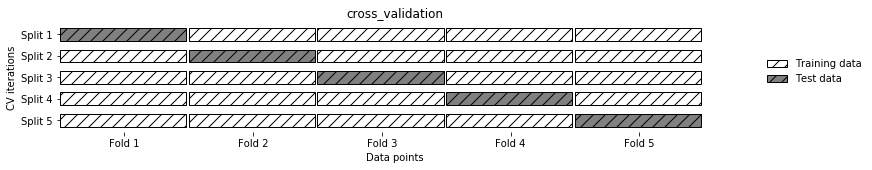

In [3]:
mglearn.plots.plot_cross_validation()

#### scikit-learn에서 model_selection module의 cross_val_score 함수 이용
* iris 데이터셋에 적용한 Logistic Regression 평가

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross_val Score: {}".format(scores))

cross_val Score: [0.96078431 0.92156863 0.95833333]


* cross_val_score의 default fold는 3겹!
* cv paramet를 사용해 변경 가능

In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("cross_val Score: {}".format(scores))

cross_val Score: [1.         0.96666667 0.93333333 0.9        1.        ]


In [6]:
print("Cross_val Average Score: {:.2f}".format(scores.mean()))

Cross_val Average Score: 0.96


#### Cross Validation의 장점
* test set에 각 샘플이 정확히 한 번씩 들어가며 test set와 train set로 분류 시 발생하는 오류 줄임
* 모델이 훈련 데이터에 얼마나 민감한지 알 수 있다
* 데이터를 효과적으로 사용 가능
* But, 연산 비용이 늘어남

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris Label:\n{}".format(iris.target))

Iris Label:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


* 위의 예처럼 데이터셋을 나열 순서대로 k-fold로 나누는 것이 항상 좋지는 않다.
#### Stratified k-Fold Cross-Validation
* 폴드 안의 클래스 비율이 전체 데이터셋의 클래스 비율과 같도록 데이터를 나눕니다.

/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:121: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color=colors, hatch="//", edgecolor='k', align='edge')
/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:125: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align='edge')
/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:158: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  height=.6, color="grey", hatch="//", edgecolor='k', align='edge')
/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:163: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. 

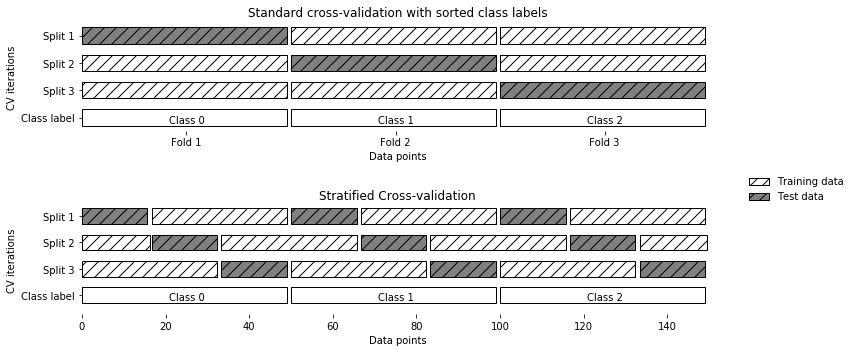

In [8]:
mglearn.plots.plot_stratified_cross_validation()

#### Cross_Validation Splitter (교차 검증 분할기)
* cv 매개변수에 절달하여 데이터 분할 시 더 세밀하게 제어 가능
* model_selection module에서 KFold 분할기를 임포트하고 원하는 폴드 수를 넣어 객체 생성

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross_Validation Score:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross_Validation Score:
[1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [10]:
kfold = KFold(n_splits=3)
print("Cross_Validation Score:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross_Validation Score:
[0. 0. 0.]


* 각 fold는 데이터셋의 클래스 중 하나에 대응하므로 아무것도 학습할 수 없음.
* 데이터를 섞어서 샘플의 순서를 뒤죽박죽!
* KFold의 shuffle 매개변수를 True로!

In [11]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross_Validation Score:\n{}".format(cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross_Validation Score:
[0.9  0.96 0.96]


#### LOOCV (Leave-One-Out Cross_Validation)
* LOOCV는 폴드 하나에 샘플 하나만 들어 있는 k-fold Cross_Validation으로 생각할 수 있다.
* 각 반복에서 하나의 데이터 포인트를 선택해 테스트 세트로 사용

In [12]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Cross_Validation Split Time: ", len(scores))
print("Average Accuracy: {:.2f}".format(scores.mean()))

Cross_Validation Split Time:  150
Average Accuracy: 0.95


#### Shuffle-Split Cross-Validation (임의 분할 교차 검증)
* train_size 만큼의 포인트로 훈련 세트를 만들고, test_size 만큼의 포인트로 테스트 세트를 만들도록 분할
* 이 분할이 n_splits 횟수만큼 반복

/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:85: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor='k', align='edge')


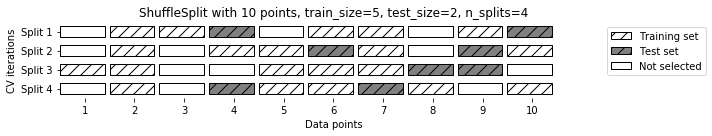

In [13]:
mglearn.plots.plot_shuffle_split()

In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross_Validation Score:\n{}".format(scores))

Cross_Validation Score:
[0.96       0.96       0.96       0.85333333 0.82666667 0.96
 0.96       0.90666667 0.96       0.93333333]


* dataset의 50%를 train_set로, 50%를 test_set로 10번 반복 분할

* 반복 횟수를 훈련 세트나 테스트 세트의 크기와 독립적으로 조절해야 할 때 유용
* train_size와 test_size의 합을 전체와 다르게 함으로써 전체 데이터의 일부만 사용 가능
* SubSampling

#### GroupKFold (그룹별 교차 검증)
* 사진의 사람이 누구인지 기록한 배열을 groups 매개변수로 전달받을 수 있는 GroupKFold 사용
* groups배열은 훈련 세트와 테스트 세트를 만들 때 분리되지 않아야 할 그룹을 지정하는 것 (클래스 레이블이 아닙니다!!)
* Face Dataset, Medical Application에 활용!

In [15]:
from sklearn.model_selection import GroupKFold
# 인위적인 데이터셋 생성
x, y = make_blobs(n_samples=12, random_state=0)
# 처음 세 개의 샘플은 같은 그룹에 속하고, 다음 네 개의 샘플이 같음
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, x, y, groups, cv=GroupKFold(n_splits=3))
print("Cross_Validation Score:\n{}".format(scores))

Cross_Validation Score:
[0.75       0.8        0.66666667]


* 12개의 데이터 포인트
* groups는 각 데이터 포인트에 대해 각 포인트가 어떤 그룹에 속하는지 나타냄
* 4개의 그룹

/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:33: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  hatch="//", edgecolor="k", align='edge')
/usr/local/lib/python3.7/site-packages/mglearn/plot_cross_validation.py:39: MatplotlibDeprecationWarning: The *bottom* kwarg to `barh` is deprecated use *y* instead. Support for *bottom* will be removed in Matplotlib 3.0
  color="w", edgecolor='k', align="edge")


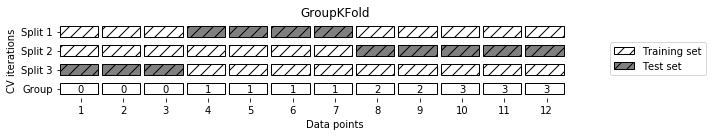

In [16]:
mglearn.plots.plot_group_kfold()

* 각 분할에서 한 그룹 전체가 훈련 세트 아니면 테스트 세트에 있다

## Grid Search
* 매개변수들을 대상으로 가능한 모든 조합 시도

#### for 문을 사용해 grid search 수행 가능!

In [18]:
from sklearn.svm import SVC
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of Train Set: {}    Size of Test Set: {}".format(x_train.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        # Evaluate SVC with Test Set
        score = svm.score(x_test, y_test)
        # 점수가 best_score보다 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
        
print("Best Score: {:.2f}".format(best_score))
print("Best Parameters: {}".format(best_parameters))

Size of Train Set: 112    Size of Test Set: 38
Best Score: 0.97
Best Parameters: {'C': 100, 'gamma': 0.001}


* 과대적합???
* 데이터를 3개로 나눕니다!
    * 훈련 세트로 모델 + 검증 세트로 모델의 매개변수 선택 + 테스트 세트로 매개변수의 성능 평가!

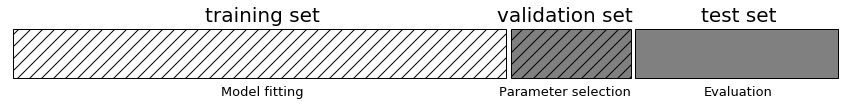

In [19]:
mglearn.plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC
#데이터를 훈련 + 검증 세트와 테스트 세트로 분할
x_trainval, x_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 훈련 + 검증 세트를 훈련 세트와 검증 세트로 분할
x_train, x_valid, y_train, y_valid = train_test_split(x_trainval, y_trainval, random_state=1)
print("Size of the Train Set: {}    Size of the Validation Set: {}   Size of the Test Set: {}\n".format(x_train.shape[0], x_valid.shape[0], x_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(x_train, y_train)
        # Evaluate SVC with Test Set
        score = svm.score(x_valid, y_valid)
        # 점수가 best_score보다 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후 테스트 세트를 사용해 평가
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)
test_score = svm.score(x_trainval, y_trainval)
print("Best score in Validation Set: {:.2f}".format(best_score))
print("Best Parameters: ", best_parameters)
print("Test Set Score in Best Parameters: {:.2f}".format(test_score))

Size of the Train Set: 84    Size of the Validation Set: 28   Size of the Test Set: 38

Best score in Validation Set: 0.96
Best Parameters:  {'C': 10, 'gamma': 0.001}
Test Set Score in Best Parameters: 0.94


#### Grid Search Using Cross Validation
* 위의 예에서 점수가 낮게 나온 것은 데이터의 개수가 적기 때문이다!
* 교차 검증을 사용하여 각 매개변수 조합의 성능을 평가해봅시다 :D

In [21]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증 적용
        scores = cross_val_score(svm, x_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균 계산
        score = np.mean(scores)
        # 점수가 best_score보다 높으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
            
# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만듭니다!
svm = SVC(**best_parameters)
svm.fit(x_trainval, y_trainval)


SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.7/site-packages/sklearn/utils/deprecation.py

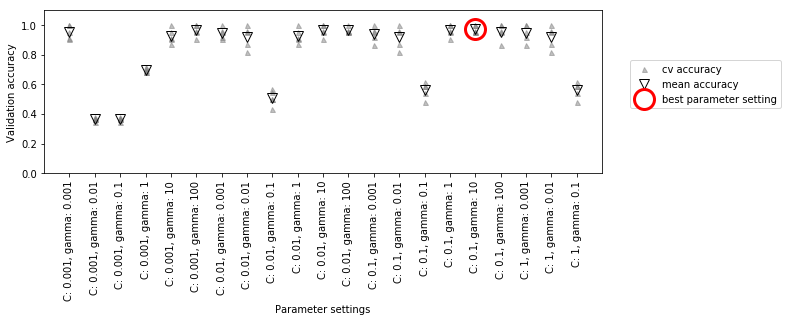

In [22]:
mglearn.plots.plot_cross_val_selection()

* 위의 코드에서 최적의 매개변수를 선택하는 방법을 보여준다.
* 각 매개변수 설정마다 교차 검증 분할에 한 개씩, 모두 다섯 개의 값을 계산
* 교차 검증 정확도 평균이 가장 높은 매개변수를 동그라미로 표시

#### * 데이터를 나누고 Grid Search를 적용해 최종 매개변수를 평가하는 전체 과정

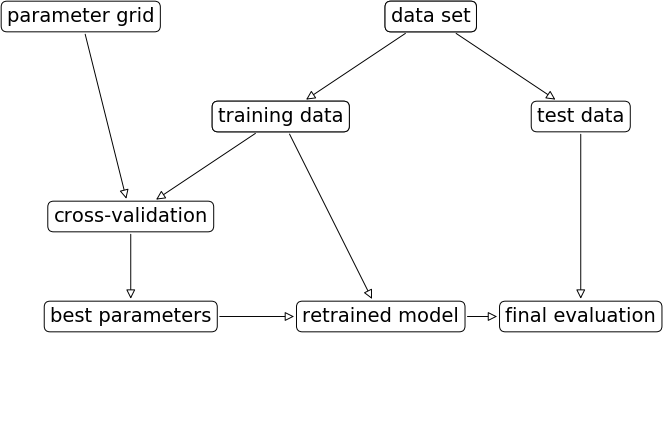

In [23]:
mglearn.plots.plot_grid_search_overview()

* 교차 검증과 그리드 서치를 사용한 매개변수 선택과 모델 평가의 작업 흐름

* scikit-learn에서 제공하는 GridSearchCV 이용 가능
* 딕셔너리 형태로 검색 대상 매개변수를 지정 후 사용

In [24]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter Grid:\n{}".format(param_grid))

Parameter Grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [26]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [29]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [30]:
print("Test Set Score: {:.2f}".format(grid_search.score(x_test, y_test)))

Test Set Score: 0.97


In [32]:
print("Best Parameters: {}".format(grid_search.best_params_))
print("Best Cross Validation Test: {:.2f}".format(grid_search.best_score_))

Best Parameters: {'C': 100, 'gamma': 0.01}
Best Cross Validation Test: 0.97


In [33]:
print("Best Model:\n{}".format(grid_search.best_estimator_))

Best Model:
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


### 교차 검증 결과 분석
* 교차 검증의 결과를 시각화해봅시다!


In [37]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000697,0.000186,0.000258,0.000023,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000575,0.000025,0.000261,0.000032,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000568,0.000018,0.000237,0.000006,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000569,0.000021,0.000241,0.000006,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000607,0.000059,0.000257,0.000028,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


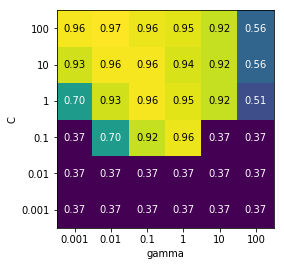

In [38]:
scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

* C와 gamma 값에 따른 교차 검증 평균 점수의 히트맵
	* 정확도가 높으면 밝은색, 낮으면 어두운 색
	* SVC는 매개변수 설정에 매우 민감하다!

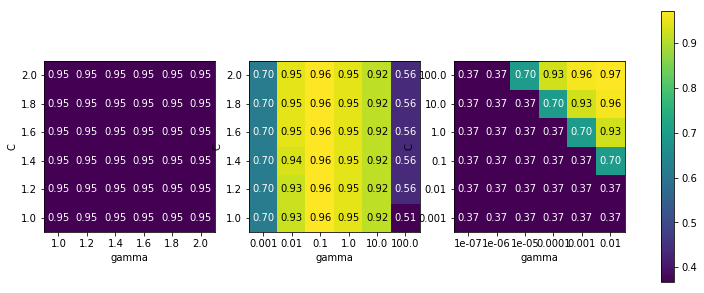

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma': np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma': np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma': np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log, param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(x_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)
    
    # 교차 검증 평균 점수 히트맵 그래프
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'], yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

* 검색범위가 적절하게 선택되지 않아 바람직하지 못한 결과를 내는 그래프 예